# A. 데이터 전처리 – 데이터 읽어오기  
• Pandas 를 사용하여 csv 파일(NLFX.csv)을 DataFrame 으로 읽어옵니다.  
• 이 때, [ ‘Data’, ‘Open’, ‘High’, ‘Low’, ‘Close’ ] 필드만 읽어오도록 구성합니다.  
• 출력 결과 예시  

In [86]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

usecols=['Date','Open','High','Low','Close']
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path,usecols=usecols)
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


# B. 데이터 전처리 – 2021년 이후의 종가 데이터 출력하기  
• csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.  
• [힌트] 필터링이 가능한 형식으로 데이터 타입을 변경한 후 필터링을 진행합니다.  
• Pandas 의 to_datetime() 을 활용합니다.  
• 필터링이 완료된 DataFrame 의 종가 데이터를 Matplotlib 를 사용하여 시각화 합니다  

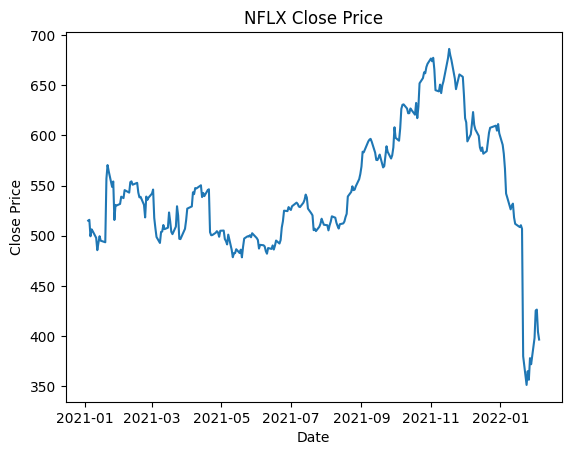

In [84]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

usecols=['Date','Open','High','Low','Close']
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path,usecols=usecols)

df['Date'] = pd.to_datetime(df['Date'])
censored_df = df[df['Date'] >= pd.to_datetime('2021-01-01')]  
plt.plot(censored_df['Date'],censored_df['Low'])
plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# C. 데이터 분석 – 2021년 이후 최고, 최저 종가 출력하기
• csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.  
• 종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가를 출력합니다.  
• Pandas 의 내장 함수를 사용합니다.  
• 출력 결과 예시  


In [89]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

usecols=['Date','Open','High','Low','Close']
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path,usecols=usecols)

df['Date'] = pd.to_datetime(df['Date'])
censored_df = df[df['Date'] >= pd.to_datetime('2021-01-01')]  

max_price = censored_df['Close'].max()
min_price = censored_df['Close'].min()

print("최고 종가:",max_price)
print("최저 종가:",min_price)

최고 종가: 691.690002
최저 종가: 359.700012


# D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기  
• csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.  
• 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만들어 그래프로 시각화 합니다.  
• 출력 결과 예시  

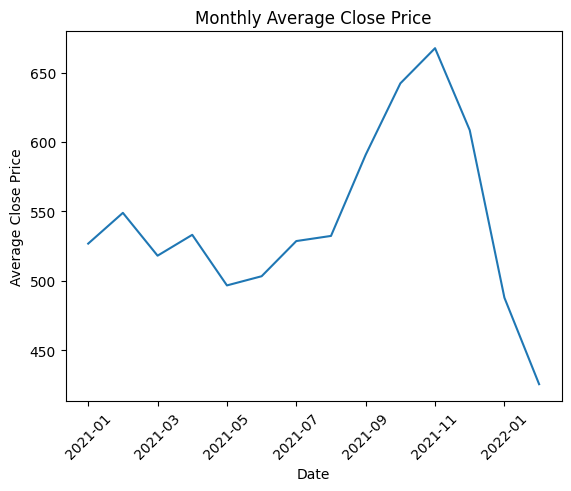

In [120]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

usecols=['Date','Open','High','Low','Close']
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path,usecols=usecols)

df['Date'] = pd.to_datetime(df['Date'])
censored_df = df[df['Date'] >= pd.to_datetime('2021-01-01')] 
group_m_df = censored_df.groupby(censored_df['Date'].dt.to_period('M')).mean('Close')
group_m_df = group_m_df.reset_index()
group_m_df['Date'] = group_m_df['Date'].dt.strftime('%Y-%m')


plt.plot(group_m_df['Date'], group_m_df['Close'])
plt.title("Monthly Average Close Price")
plt.xticks(group_m_df.index[::2], group_m_df['Date'][::2], rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.show()


# E. 데이터 시각화 – 2022년 이후 최고, 최저, 종가 시각화하기  
• csv 파일을 DataFrame 으로 읽어와 2022년 이후의 데이터만 필터링합니다.  
• Matplotlib 를 활용하여 3가지 필드를 한 번에 분석할 수 있도록 아래와 같이 시각화 합니다.  
• 출력 결과 예시  

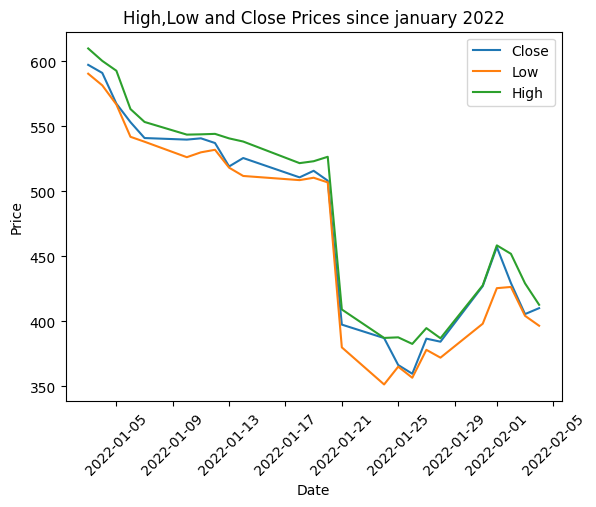

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

usecols=['Date','Open','High','Low','Close']
csv_path = "NFLX.csv"
df = pd.read_csv(csv_path,usecols=usecols)

df['Date'] = pd.to_datetime(df['Date'])
censored_df = df[df['Date'] >= pd.to_datetime('2022-01-01')] 

plt.plot(censored_df['Date'], censored_df['Close'], label='Close')
plt.plot(censored_df['Date'], censored_df['Low'], label='Low')
plt.plot(censored_df['Date'], censored_df['High'], label='High')

plt.title("High,Low and Close Prices since january 2022")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation = 45)
plt.show()